# 1. Data Loading


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# 2. Data Validation


## 2.1 explore data size


In [3]:
print(f'{df.shape[0]} rows, {df.shape[1]} columns')

15000 rows, 8 columns


## 2.2 remove duplicates


In [4]:
df[df.duplicated()]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


there is no duplicates


## 2.3 handle missing values


In [5]:
df.replace(['NA','NULL'],np.nan,inplace=True,regex=True)
df.isnull().any()

week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue               True
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool

In [6]:
# the number of missing values
df[df['revenue'].isnull()].shape[0]

1074

since only 1074 missing values in revenue, we will remove them


In [7]:
df=df[df['revenue'].notnull()]

## 2.4 validate datatype


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


all the column datatype are displayed as decribed, there is no need for datatype transformation.


## 2.5 validate data consistency


In [9]:
df['sales_method'].value_counts()

Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: sales_method, dtype: int64

standardize data format of the sales_method column


In [10]:
df.replace('email','Email',inplace=True)
df.replace('em + call','Email + Call',inplace=True)
df['sales_method'].value_counts()

Email           6922
Call            4781
Email + Call    2223
Name: sales_method, dtype: int64

In [11]:
df['state'].value_counts()

California        1739
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virginia       77
Hawaii              67
Maine               60
Idaho               59
New Hampshire       48
Montana             43
Rhode Islan

no need to change


## 2.5 handle outliers


In [12]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


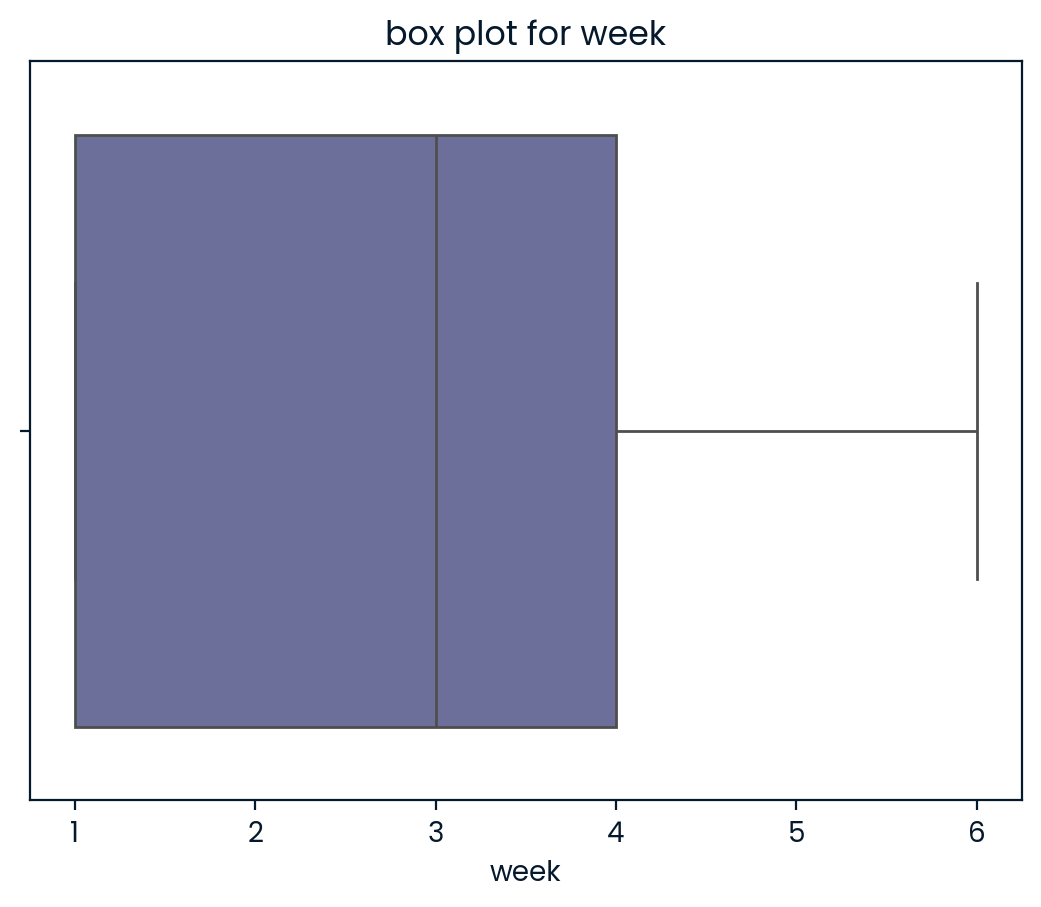

In [13]:
sns.boxplot(data=df,x='week')
plt.figure.figsize=(8,6)
plt.title('box plot for week')
plt.show()

**week**: the new prodcut line launched 6 weeks ago, there is no outliers in this column


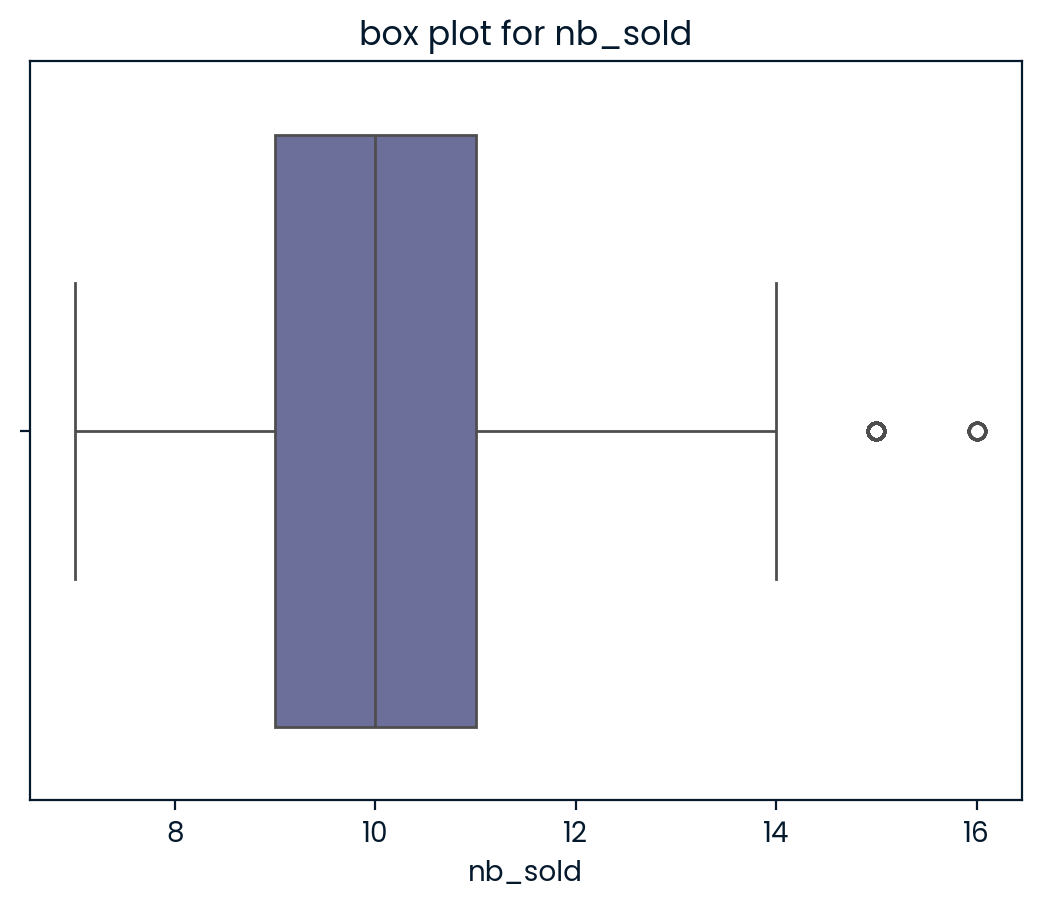

In [14]:
sns.boxplot(data=df,x='nb_sold')
plt.figure.figsize=(8,6)
plt.title('box plot for nb_sold')
plt.show()

In [15]:
df[df['nb_sold']>15]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
213,6,Email + Call,00dc7276-7b92-4642-9d24-69c841286964,16,232.86,1,33,Michigan
575,6,Email + Call,a0b8123a-0f92-4152-8ea0-cc732e452f49,16,234.03,6,29,California
735,6,Email + Call,0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.19,2,29,California
1288,6,Email + Call,a42b682d-573a-4301-82b1-42caa5dccc46,16,232.73,4,30,Georgia
1426,6,Email + Call,fce8075a-23bc-45ff-b537-793a2ddd99c0,16,234.08,0,30,New York
1684,6,Email + Call,c1c73fb9-cf35-47e2-94d0-eec90bcada4d,16,233.80,0,30,Florida
1743,6,Email + Call,7fc56abe-dbf1-418a-988c-08e33ebe30bd,16,233.39,1,32,Oregon
1760,6,Email + Call,4aba322a-0532-4925-b7ae-c51d9dc359ef,16,232.89,3,36,Florida
2487,6,Email + Call,5bc155b2-a053-472c-a8e1-9a6caf1f584b,16,232.97,0,29,California
2661,6,Email + Call,efd9156a-f466-4a5c-9e28-5960fb69b36c,16,233.32,13,28,Louisiana


**nb_sold**: after analysis the outliers are resonable sales, so keep them


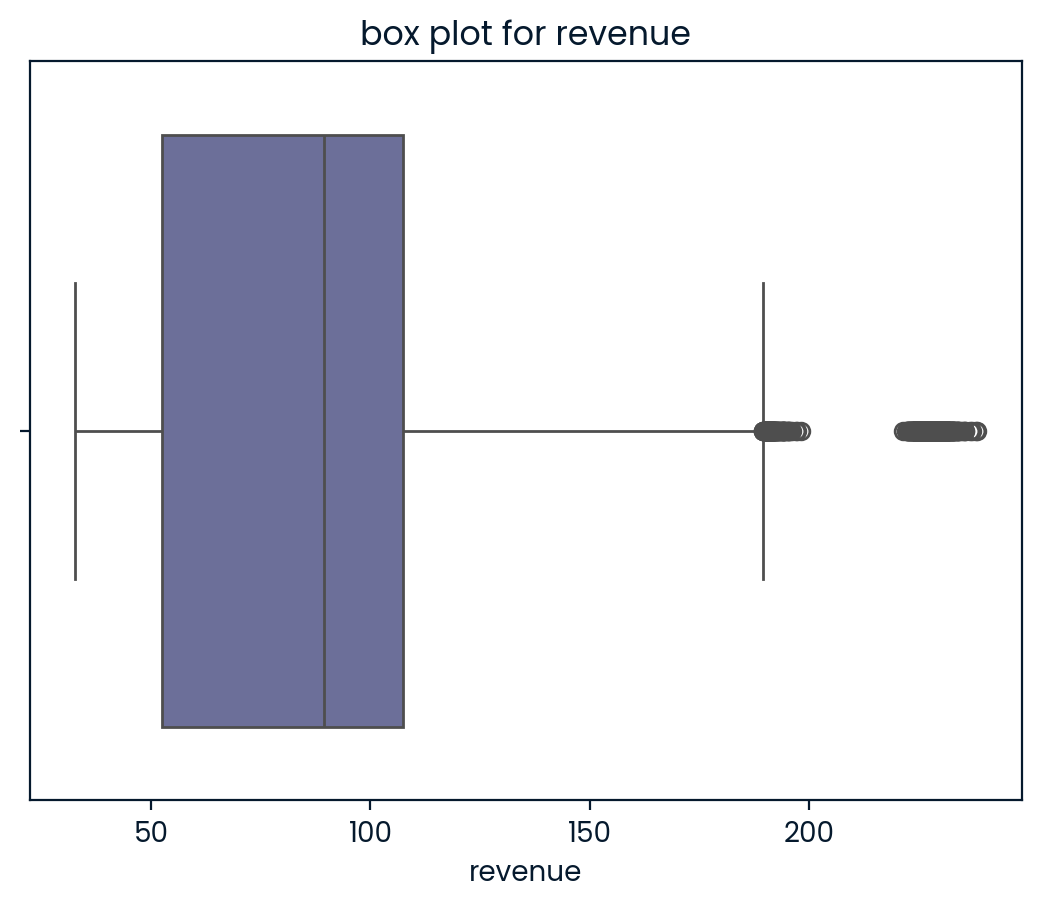

In [16]:
sns.boxplot(data=df,x='revenue')
plt.figure.figsize=(8,6)
plt.title('box plot for revenue')
plt.show()

In [17]:
df[df['revenue']>180].sort_values('revenue',ascending=False)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
3490,6,Email + Call,21513a8f-f7aa-4ff7-b212-b213117c5a07,16,238.32,0,36,North Carolina
12006,6,Email + Call,5a34f271-29fd-4777-a9d6-ffd5076f4f55,16,238.23,3,33,New York
735,6,Email + Call,0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.19,2,29,California
6792,6,Email + Call,535ddeb0-ca5d-40f2-a0e0-733c864fe686,16,236.75,2,30,Florida
4238,6,Email + Call,68c72896-b99a-44e8-89ac-061ef612f20e,16,235.59,6,32,North Carolina
...,...,...,...,...,...,...,...,...
13982,4,Email + Call,bc560dda-d147-44ff-97b7-4e179c6dcbdf,12,180.15,6,25,California
8784,4,Email + Call,6224294c-c6cd-4512-a77a-eee23e8cd000,12,180.15,8,21,Texas
8366,4,Email + Call,18ed8a03-de99-4ed8-8921-22a1b335671e,12,180.08,11,25,Maine
11037,4,Email + Call,4da3a6d2-d38b-4f4a-b7b6-e9a62df80920,12,180.07,2,30,Mississippi


**revenue**: after analysis the relatively high revenue values are corresponding with higher nb_sold. Therefore, they are considered as resonable records


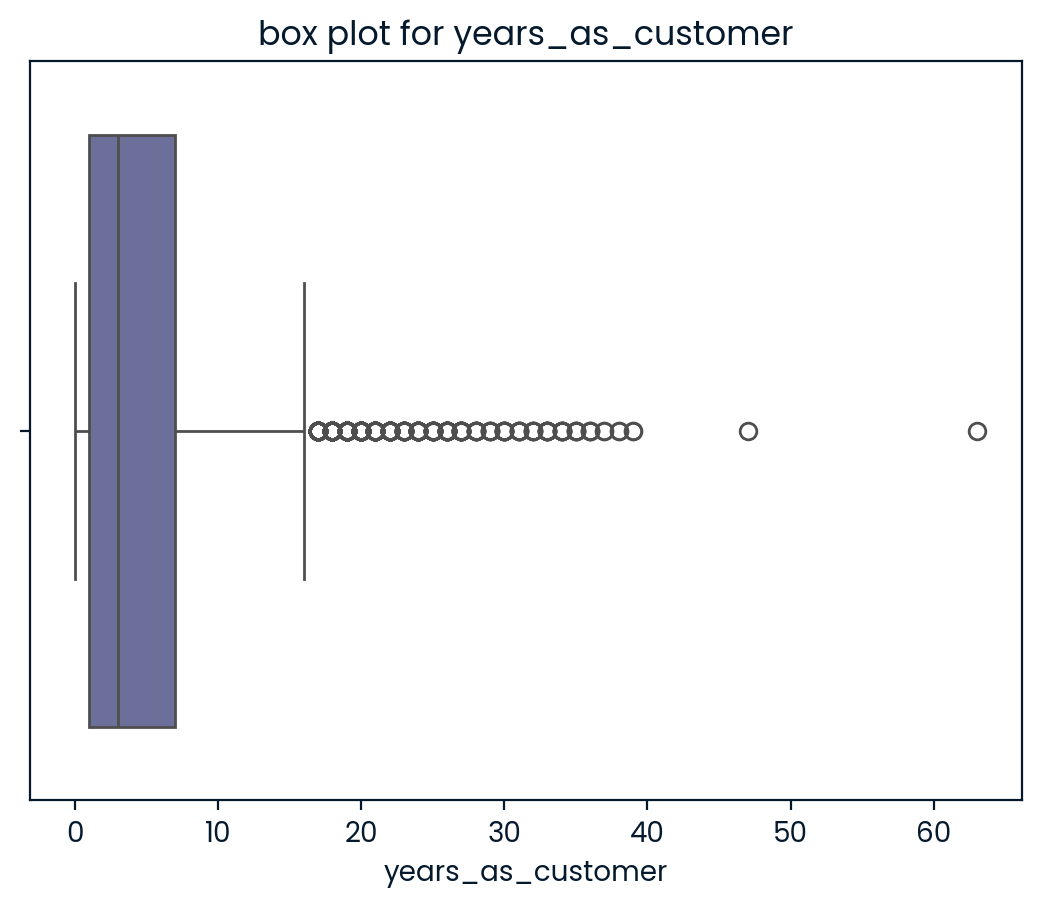

In [18]:
sns.boxplot(data=df,x='years_as_customer')
plt.figure.figsize=(8,6)
plt.title('box plot for years_as_customer')
plt.show()

**years_as_customer**:the company founded in 1984, 2025-1984=41, so records over 41 years are invalid data.


In [19]:
df.drop(df[df['years_as_customer']>41].index,inplace=True)

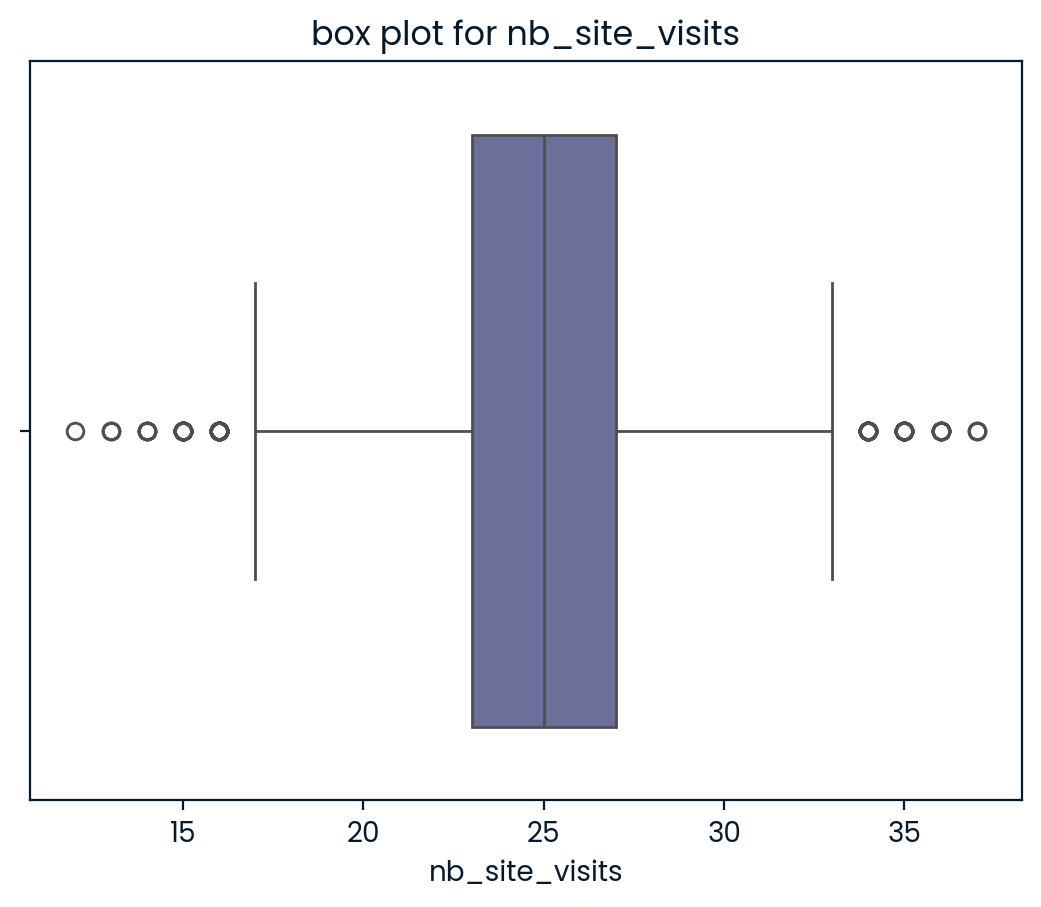

In [20]:
sns.boxplot(data=df,x='nb_site_visits')
plt.figure.figsize=(8,6)
plt.title('box plot for nb_site_visits')
plt.show()

In [21]:
df[df['nb_site_visits']<18]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
89,1,Call,a1651d36-f88a-4535-882b-40f132bd72a0,7,33.63,3,16,Connecticut
145,1,Email,a0b8facb-0ed7-457b-a0a5-b3e6e5f365dd,8,83.36,4,17,Louisiana
178,1,Email,2d28eba7-c238-4f72-af52-e9d750019c3c,8,80.72,12,17,California
179,2,Email,969a4d7a-3dd1-47da-ac27-7ccec8780c7f,10,97.15,1,16,Tennessee
263,1,Call,a7dc9f77-3bee-48b4-8f48-b6a517780d41,7,34.06,9,17,Michigan
...,...,...,...,...,...,...,...,...
14534,1,Call,e7cb7e48-342c-4464-9d13-10ce2dce3a57,7,35.08,2,17,California
14573,1,Email,31adf282-00e0-4795-b68c-84bf6791fb29,8,82.92,11,16,California
14590,5,Email,9799596c-42d9-457d-97e2-b0512279a1f9,10,104.17,3,16,Washington
14630,1,Call,6e097c07-9949-4509-946a-ed96e48d74e0,7,34.70,2,17,Louisiana


In [22]:
df[df['nb_site_visits']>33]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
79,5,Email,d42b0e9b-8e2f-4c4e-b94e-cf5db08adc7a,11,107.12,10,35,Georgia
292,6,Call,49204efd-ee2e-4712-b614-3aa1ca03c2ed,13,65.86,11,34,New Jersey
387,2,Email + Call,8015296a-82a2-46f9-8899-856e871e5441,10,151.10,0,35,Massachusetts
836,6,Call,7d4d591d-5959-48f9-ab35-20d218dd0472,13,64.89,2,35,Indiana
948,6,Email + Call,5521108f-1946-45ca-ae5d-8cf707fe62cc,15,223.99,1,34,New York
...,...,...,...,...,...,...,...,...
13783,5,Email + Call,74daf59f-8a18-4ac0-9adf-4c821a3a99fa,13,193.91,5,35,New Jersey
14089,4,Email,a1591a11-5860-4ae6-ac62-6eb839340dc3,11,105.33,1,34,New Mexico
14333,6,Email + Call,0b5c4f6b-9662-4082-916d-698a63371d7a,15,228.36,5,34,Ohio
14727,6,Call,14f5217b-7b5d-47b8-93bb-88a696f8b23f,13,66.20,5,37,Florida


**nb_site_visits** is the number of times the customer has visited our website in the last 6 months, so there is no significant outliers for this column


# 3. Exploratory Analysis


## 3.1 single variable exploratory


### customer distribution by sales method


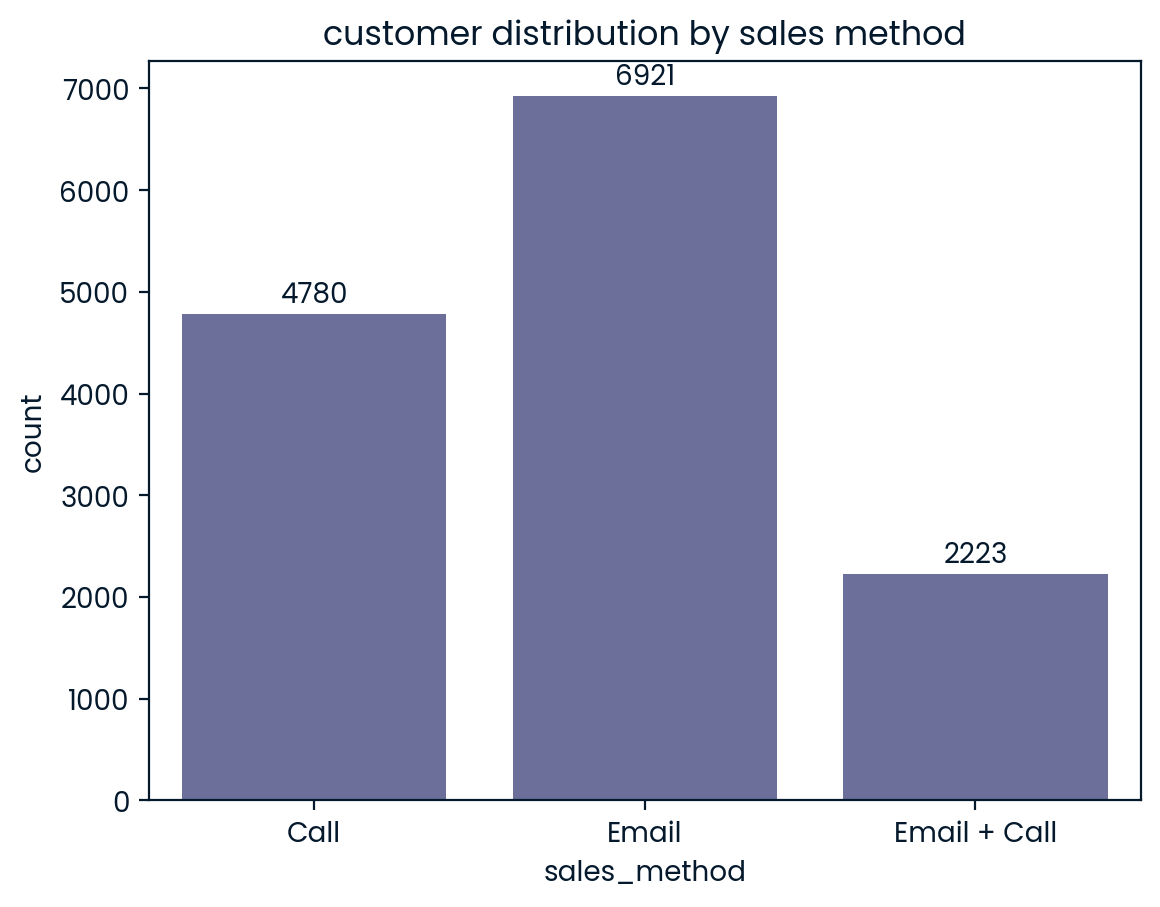

In [23]:
method_group=df.groupby('sales_method')['customer_id'].count().reset_index(name='count')
sns.barplot(data=method_group,x='sales_method',y='count')
plt.title('customer distribution by sales method')
for index, row in method_group.iterrows():
    plt.text(index, row['count'] + 50, row['count'], ha='center', va='bottom')
plt.show()

**Email**: The largest group of customers (6921) is reached through the Email sales method.

**Call**: The second-largest group (4780) consists of customers reached via Call.

**Email + Call**: The smallest group (2223) includes customers who were contacted using a combination of Email + Call.


### revenue distribution


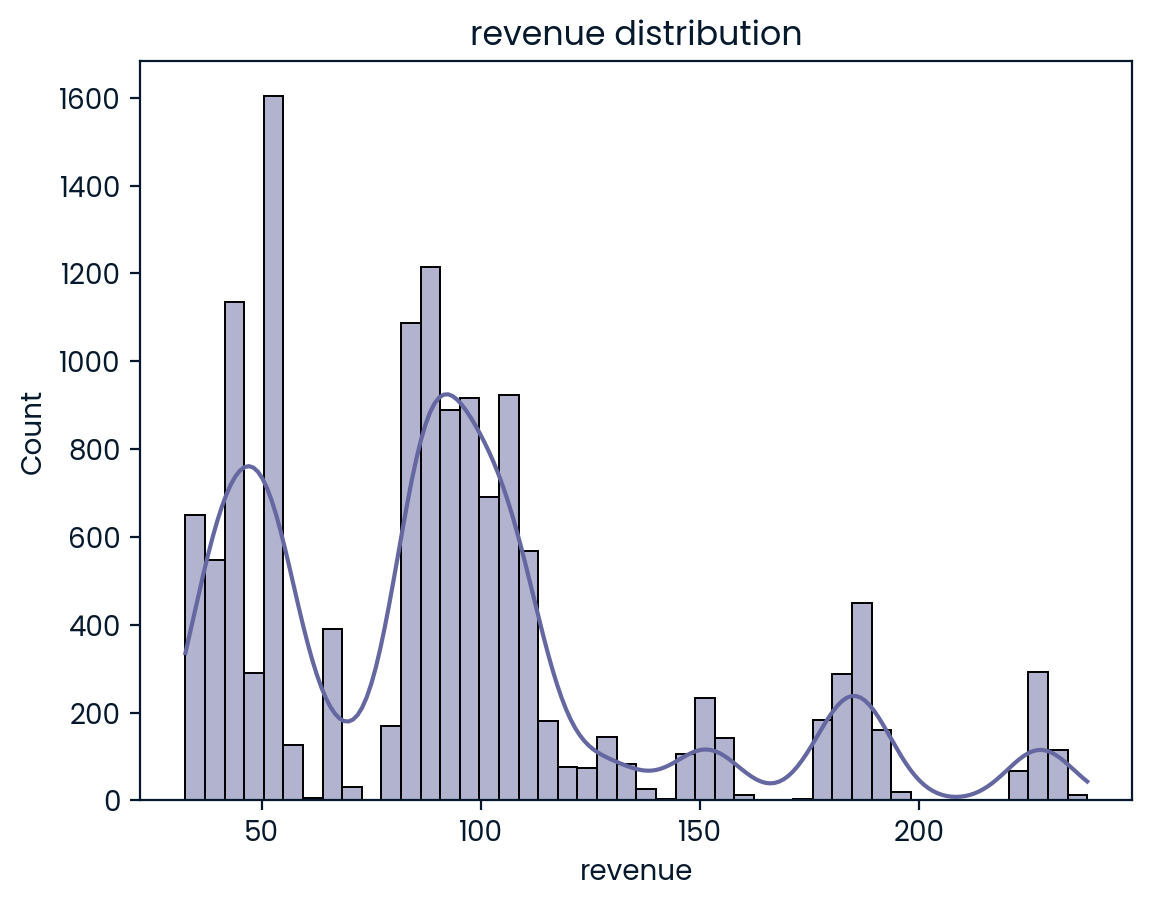

In [24]:
sns.histplot(data=df,x='revenue',kde=True)
plt.title('revenue distribution')
plt.show()

### Revenue Distribution:

The chart shows two main peaks, one around **50** and the other around **100**. This indicates that the majority of the revenue is concentrated in these two ranges.

There are also some discrete peaks, such as between 150 and 200, which could represent a small number of high-income sales.

### Revenue Concentration Trend:

From the KDE curve, it is clear that most of the revenue is distributed between 50 and 150, suggesting a certain level of concentration in revenue.

### Data Distribution Characteristics:

This chart displays a multi-modal distribution, which may indicate that the revenue sources are not homogeneous, or there may be distinct customer segments contributing to the different revenue levels.


## 3.2 mulitiple variables analysis


### revenue distribution by sales method


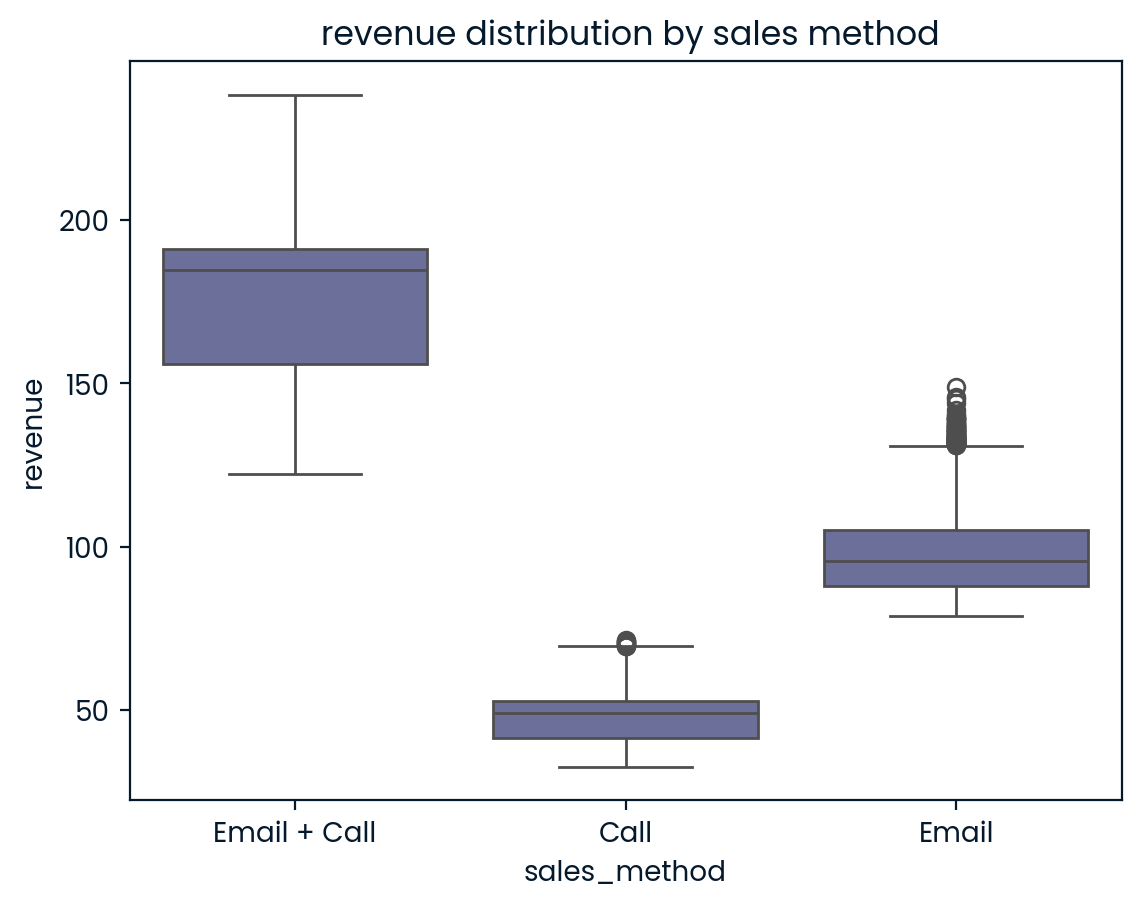

In [25]:
sns.boxplot(data=df,x='sales_method',y='revenue')
plt.title(' revenue distribution by sales method')
plt.show()

**Email**: the most time-efficient, but its revenue performance is moderate

**Call**: the most time-consuming, with lower revenue

**Email + Call**: has a moderate time investment and moderate revenue performance, indicating that combining both email and phone calls can yield higher revenue while saving time.


### weekly total revenue over time by sales method


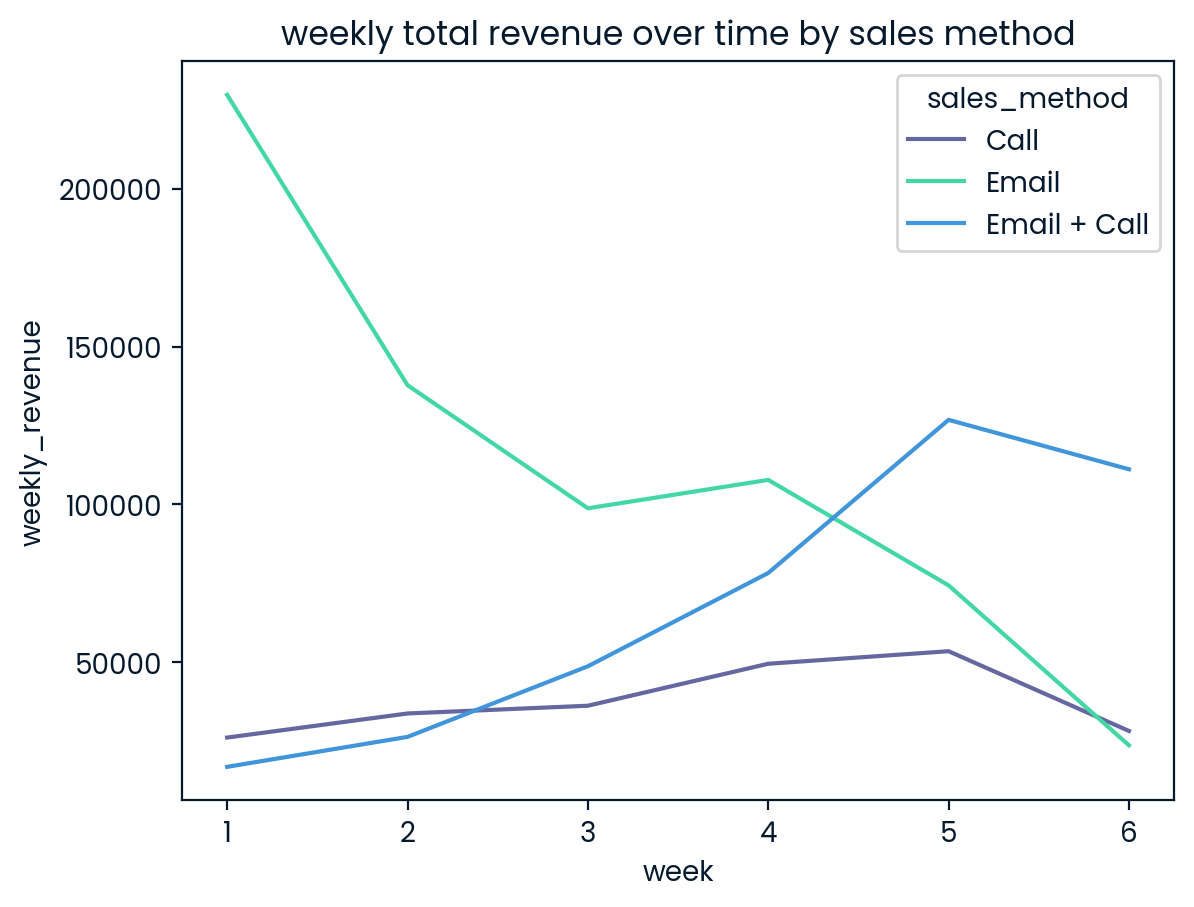

In [26]:
pivot=pd.pivot_table(data=df,index='sales_method',columns='week',values='revenue',aggfunc='sum')
pivot=pivot.unstack().reset_index(name='weekly_revenue')
sns.lineplot(data=pivot,x='week',y='weekly_revenue',hue='sales_method')
plt.title('weekly total revenue over time by sales method')
plt.show()

**Email**: performed well initially, but its revenue declined over time.

**Call**: although its revenue gradually increased over time, it still underperformed compared to other methods.

**Email + Call**: exhibited significant fluctuations, likely due to the combination of email and phone calls. Initially, the conversion rate was low, resulting in lower revenue, but over time, the sales grew steadily.


### years_as_customer distribution by sales method


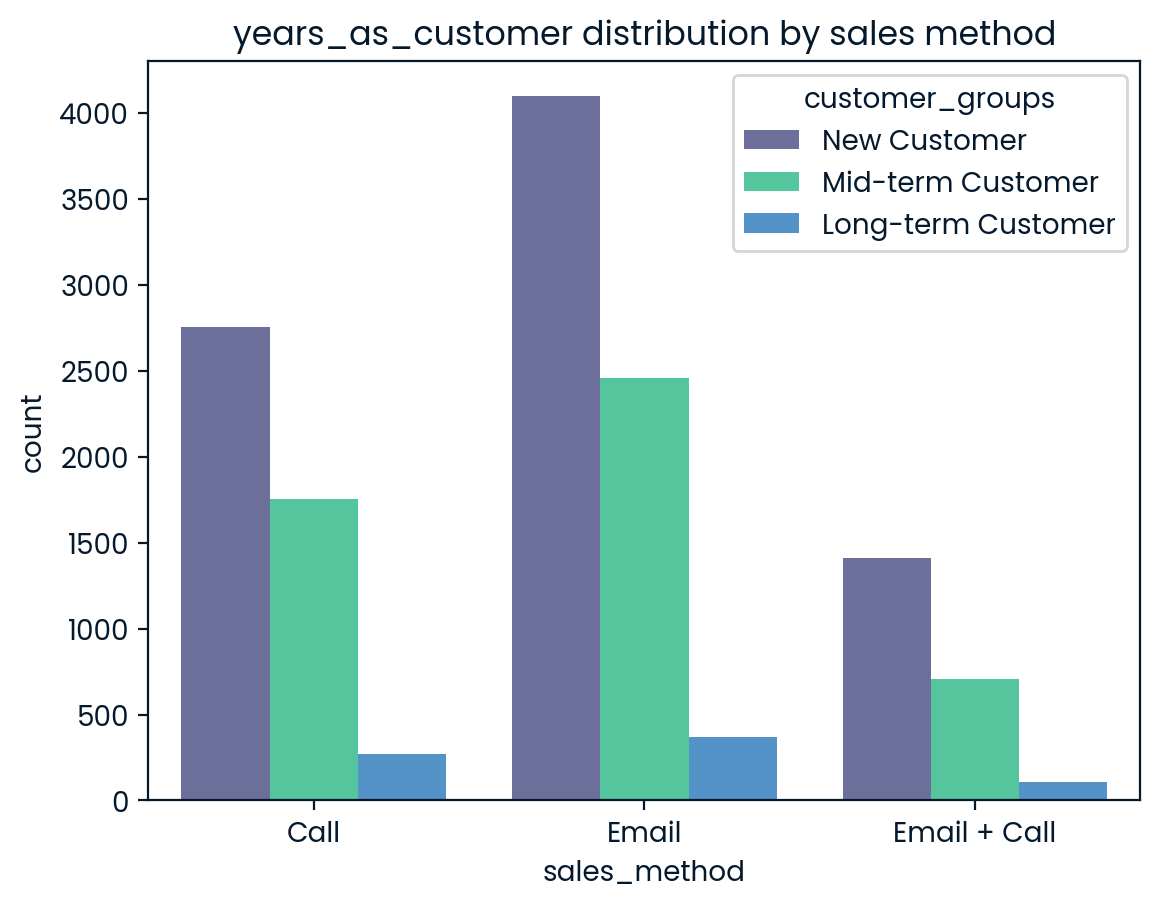

In [27]:
df['customer_groups']=pd.cut(df['years_as_customer'],bins=[0,5,15,40],labels=['New Customer', 'Mid-term Customer', 'Long-term Customer'],right=False)
cust_group=df.groupby('sales_method')['customer_groups'].value_counts().reset_index(name='count')
sns.barplot(data=cust_group,x='sales_method', y='count',hue='customer_groups')
plt.title('years_as_customer distribution by sales method')
plt.show()

**Call**: mainly attracts **new customers**, but its attracting power is not as strong as the **Email** method.

**Email**: has a relatively balanced customer distribution, attracting **new customers** as well as a certain proportion of **mid-term** and **long-term customers**.

**Email + Call**: mainly attracts **new customers** and **mid-term customers**, with fewer **long-term customers**.


# 4. Business Metrics-weekly average revenue

Since our goal is to select the most suitable sales method for the new product, we can use the **weekly average revenue** as a metric. This will help evaluate the effectiveness of the chosen sales method and the rationale behind the sales method selection.


### initial values


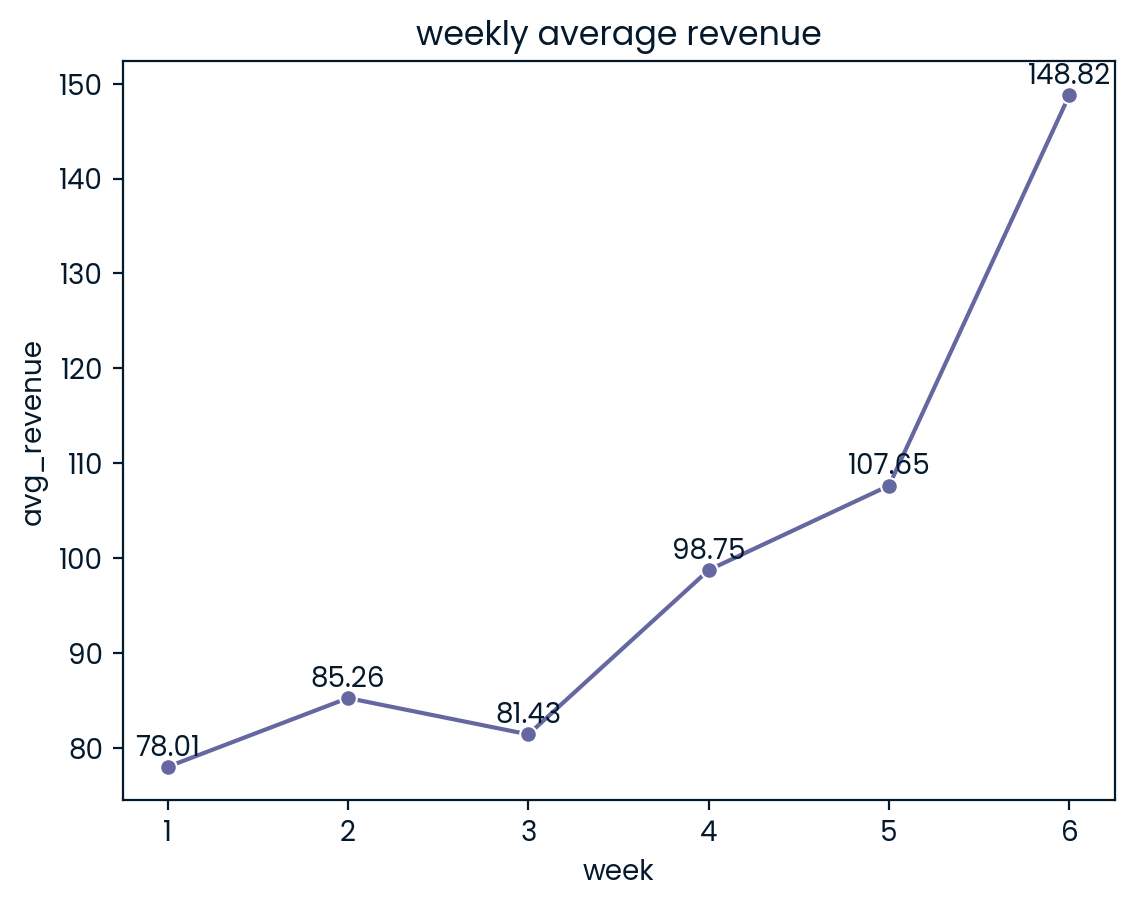

In [28]:
weekly_avg_revenue=df.groupby('week')['revenue'].agg('mean').round(2).reset_index(name='avg_revenue')
sns.lineplot(data=weekly_avg_revenue,x='week',y='avg_revenue',marker='o')
for index,row in weekly_avg_revenue.iterrows():
    plt.text(row['week'],row['avg_revenue']+0.5,row['avg_revenue'],ha='center',va='bottom')
plt.title('weekly average revenue')
plt.show()

The weekly average revenue calculated above serves as the baseline for the metrics based on current data. If the average weekly revenue increases thereafter, it indicates that the chosen sales method is effective.


### **Summary:**

Based on my data analysis, the **Email** sales method should be selected for the new product for the following reasons:

1. **Revenue Performance**: Over the past 6 weeks, the **Email** method has generated the highest revenue compared to other sales methods.
2. **Customer Coverage**: This method effectively reaches a broad range of customers, including both **new customers** and **mid-term/long-term customers** (based on years_as_customer).
3. **Efficiency**: The **Email** sales method is **time-efficient** and **resource-efficient**, allowing the business to save valuable resources while still achieving strong sales performance.

In contrast, the other two sales methods, which involve **Call**, have shown poor revenue performance and are **resource-intensive**, making them less effective. Therefore, these methods should be discontinued.


### **Recommendation:**

1. **Monitor Weekly Revenue**:

Closely track the weekly average revenue after adopting the **Email** sales method. Compare it to the baseline (the average revenue before the change) to assess whether there is a consistent upward trend in revenue.

2. **Focus on Growth-Driven Methods**:

Continue using the **Email** method if the average revenue shows consistent or increasing growth. If the revenue starts to decline, reassess the sales approach and consider optimizing the **Email** strategy or exploring adjustments.

3. **Evaluate Additional Factors**:

While monitoring revenue, also assess **customer engagement**, **retention**, and **conversion rates**. These factors will provide a more comprehensive view of the effectiveness of the sales strategy and help in making data-driven decisions about future adjustments.
